In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('train_data.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# sns.countplot(x = 'Property_Area', hue="Loan_Status", data=data)
# plt.title('Frequency of loan approval status based on Property Area')

In [5]:
#data['Dependents']=data['Dependents'].fillna(0)

In [6]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [7]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [8]:
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)

In [9]:
data=data.drop(columns='Loan_ID')
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [10]:
target = data["Loan_Status_Y"]

In [11]:
feature_names=data.columns

In [12]:
data_new = data.drop("Loan_Status_Y", axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, random_state=42)

In [14]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7662337662337663

In [15]:
len(X_train)
len(y_train)

460

In [16]:
len(y_train)

460

In [17]:
# importance probability 
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.26997675244575314, 'Credit_History'),
 (0.20079867151910227, 'ApplicantIncome'),
 (0.17714880404871128, 'LoanAmount'),
 (0.1085522927676244, 'CoapplicantIncome'),
 (0.050322718801176405, 'Loan_Amount_Term'),
 (0.029465692416440325, 'Property_Area_Semiurban'),
 (0.026526613964469183, 'Married_Yes'),
 (0.02240052448144224, 'Gender_Male'),
 (0.022235140572351632, 'Dependents_1'),
 (0.022218981210480177, 'Education_Not Graduate'),
 (0.021998549258925245, 'Property_Area_Urban'),
 (0.01891554856572761, 'Self_Employed_Yes'),
 (0.016942702934407517, 'Dependents_2'),
 (0.012497007013388316, 'Dependents_3+')]

In [18]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.8195652173913044
Testing Data Score: 0.7727272727272727


In [21]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [22]:
prediction_df=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
prediction_df

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
149,1,1
150,1,1
151,1,1
152,0,0


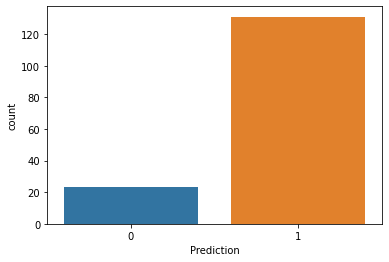

In [23]:
sns.countplot(prediction_df['Prediction'])

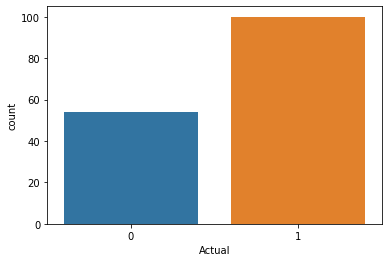

In [24]:
sns.countplot(prediction_df['Actual'])

In [25]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [26]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 output

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=14))
model.add(Dense(units=2, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [29]:
y_train=to_categorical(y_train)

In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)


Epoch 1/1000
15/15 - 1s - loss: 0.7637 - accuracy: 0.6609
Epoch 2/1000
15/15 - 0s - loss: 0.7418 - accuracy: 0.6696
Epoch 3/1000
15/15 - 0s - loss: 0.7236 - accuracy: 0.6717
Epoch 4/1000
15/15 - 0s - loss: 0.7065 - accuracy: 0.6761
Epoch 5/1000
15/15 - 0s - loss: 0.6899 - accuracy: 0.6826
Epoch 6/1000
15/15 - 0s - loss: 0.6759 - accuracy: 0.6848
Epoch 7/1000
15/15 - 0s - loss: 0.6611 - accuracy: 0.6935
Epoch 8/1000
15/15 - 0s - loss: 0.6475 - accuracy: 0.7022
Epoch 9/1000
15/15 - 0s - loss: 0.6349 - accuracy: 0.7065
Epoch 10/1000
15/15 - 0s - loss: 0.6230 - accuracy: 0.7152
Epoch 11/1000
15/15 - 0s - loss: 0.6106 - accuracy: 0.7196
Epoch 12/1000
15/15 - 0s - loss: 0.5999 - accuracy: 0.7261
Epoch 13/1000
15/15 - 0s - loss: 0.5896 - accuracy: 0.7391
Epoch 14/1000
15/15 - 0s - loss: 0.5797 - accuracy: 0.7435
Epoch 15/1000
15/15 - 0s - loss: 0.5699 - accuracy: 0.7565
Epoch 16/1000
15/15 - 0s - loss: 0.5606 - accuracy: 0.7609
Epoch 17/1000
15/15 - 0s - loss: 0.5522 - accuracy: 0.7652
Epoch 

Epoch 140/1000
15/15 - 0s - loss: 0.3924 - accuracy: 0.8326
Epoch 141/1000
15/15 - 0s - loss: 0.3920 - accuracy: 0.8326
Epoch 142/1000
15/15 - 0s - loss: 0.3918 - accuracy: 0.8326
Epoch 143/1000
15/15 - 0s - loss: 0.3919 - accuracy: 0.8326
Epoch 144/1000
15/15 - 0s - loss: 0.3919 - accuracy: 0.8304
Epoch 145/1000
15/15 - 0s - loss: 0.3914 - accuracy: 0.8326
Epoch 146/1000
15/15 - 0s - loss: 0.3909 - accuracy: 0.8326
Epoch 147/1000
15/15 - 0s - loss: 0.3909 - accuracy: 0.8326
Epoch 148/1000
15/15 - 0s - loss: 0.3904 - accuracy: 0.8326
Epoch 149/1000
15/15 - 0s - loss: 0.3901 - accuracy: 0.8326
Epoch 150/1000
15/15 - 0s - loss: 0.3900 - accuracy: 0.8326
Epoch 151/1000
15/15 - 0s - loss: 0.3897 - accuracy: 0.8326
Epoch 152/1000
15/15 - 0s - loss: 0.3894 - accuracy: 0.8326
Epoch 153/1000
15/15 - 0s - loss: 0.3890 - accuracy: 0.8326
Epoch 154/1000
15/15 - 0s - loss: 0.3888 - accuracy: 0.8326
Epoch 155/1000
15/15 - 0s - loss: 0.3888 - accuracy: 0.8326
Epoch 156/1000
15/15 - 0s - loss: 0.3881

Epoch 277/1000
15/15 - 0s - loss: 0.3633 - accuracy: 0.8435
Epoch 278/1000
15/15 - 0s - loss: 0.3630 - accuracy: 0.8457
Epoch 279/1000
15/15 - 0s - loss: 0.3634 - accuracy: 0.8500
Epoch 280/1000
15/15 - 0s - loss: 0.3627 - accuracy: 0.8478
Epoch 281/1000
15/15 - 0s - loss: 0.3627 - accuracy: 0.8457
Epoch 282/1000
15/15 - 0s - loss: 0.3625 - accuracy: 0.8435
Epoch 283/1000
15/15 - 0s - loss: 0.3624 - accuracy: 0.8435
Epoch 284/1000
15/15 - 0s - loss: 0.3623 - accuracy: 0.8435
Epoch 285/1000
15/15 - 0s - loss: 0.3618 - accuracy: 0.8413
Epoch 286/1000
15/15 - 0s - loss: 0.3619 - accuracy: 0.8435
Epoch 287/1000
15/15 - 0s - loss: 0.3614 - accuracy: 0.8413
Epoch 288/1000
15/15 - 0s - loss: 0.3614 - accuracy: 0.8457
Epoch 289/1000
15/15 - 0s - loss: 0.3612 - accuracy: 0.8435
Epoch 290/1000
15/15 - 0s - loss: 0.3611 - accuracy: 0.8435
Epoch 291/1000
15/15 - 0s - loss: 0.3610 - accuracy: 0.8457
Epoch 292/1000
15/15 - 0s - loss: 0.3608 - accuracy: 0.8478
Epoch 293/1000
15/15 - 0s - loss: 0.3605

Epoch 414/1000
15/15 - 0s - loss: 0.3442 - accuracy: 0.8543
Epoch 415/1000
15/15 - 0s - loss: 0.3439 - accuracy: 0.8543
Epoch 416/1000
15/15 - 0s - loss: 0.3437 - accuracy: 0.8565
Epoch 417/1000
15/15 - 0s - loss: 0.3444 - accuracy: 0.8565
Epoch 418/1000
15/15 - 0s - loss: 0.3435 - accuracy: 0.8565
Epoch 419/1000
15/15 - 0s - loss: 0.3439 - accuracy: 0.8543
Epoch 420/1000
15/15 - 0s - loss: 0.3438 - accuracy: 0.8543
Epoch 421/1000
15/15 - 0s - loss: 0.3433 - accuracy: 0.8543
Epoch 422/1000
15/15 - 0s - loss: 0.3435 - accuracy: 0.8565
Epoch 423/1000
15/15 - 0s - loss: 0.3432 - accuracy: 0.8565
Epoch 424/1000
15/15 - 0s - loss: 0.3430 - accuracy: 0.8543
Epoch 425/1000
15/15 - 0s - loss: 0.3429 - accuracy: 0.8543
Epoch 426/1000
15/15 - 0s - loss: 0.3429 - accuracy: 0.8565
Epoch 427/1000
15/15 - 0s - loss: 0.3429 - accuracy: 0.8565
Epoch 428/1000
15/15 - 0s - loss: 0.3427 - accuracy: 0.8565
Epoch 429/1000
15/15 - 0s - loss: 0.3428 - accuracy: 0.8587
Epoch 430/1000
15/15 - 0s - loss: 0.3433

Epoch 551/1000
15/15 - 0s - loss: 0.3253 - accuracy: 0.8674
Epoch 552/1000
15/15 - 0s - loss: 0.3252 - accuracy: 0.8674
Epoch 553/1000
15/15 - 0s - loss: 0.3249 - accuracy: 0.8696
Epoch 554/1000
15/15 - 0s - loss: 0.3249 - accuracy: 0.8674
Epoch 555/1000
15/15 - 0s - loss: 0.3246 - accuracy: 0.8674
Epoch 556/1000
15/15 - 0s - loss: 0.3244 - accuracy: 0.8696
Epoch 557/1000
15/15 - 0s - loss: 0.3247 - accuracy: 0.8674
Epoch 558/1000
15/15 - 0s - loss: 0.3243 - accuracy: 0.8674
Epoch 559/1000
15/15 - 0s - loss: 0.3240 - accuracy: 0.8674
Epoch 560/1000
15/15 - 0s - loss: 0.3243 - accuracy: 0.8674
Epoch 561/1000
15/15 - 0s - loss: 0.3238 - accuracy: 0.8674
Epoch 562/1000
15/15 - 0s - loss: 0.3239 - accuracy: 0.8696
Epoch 563/1000
15/15 - 0s - loss: 0.3239 - accuracy: 0.8717
Epoch 564/1000
15/15 - 0s - loss: 0.3237 - accuracy: 0.8717
Epoch 565/1000
15/15 - 0s - loss: 0.3236 - accuracy: 0.8739
Epoch 566/1000
15/15 - 0s - loss: 0.3231 - accuracy: 0.8739
Epoch 567/1000
15/15 - 0s - loss: 0.3240

Epoch 688/1000
15/15 - 0s - loss: 0.3126 - accuracy: 0.8739
Epoch 689/1000
15/15 - 0s - loss: 0.3131 - accuracy: 0.8717
Epoch 690/1000
15/15 - 0s - loss: 0.3126 - accuracy: 0.8739
Epoch 691/1000
15/15 - 0s - loss: 0.3125 - accuracy: 0.8739
Epoch 692/1000
15/15 - 0s - loss: 0.3129 - accuracy: 0.8717
Epoch 693/1000
15/15 - 0s - loss: 0.3123 - accuracy: 0.8739
Epoch 694/1000
15/15 - 0s - loss: 0.3119 - accuracy: 0.8739
Epoch 695/1000
15/15 - 0s - loss: 0.3121 - accuracy: 0.8739
Epoch 696/1000
15/15 - 0s - loss: 0.3119 - accuracy: 0.8761
Epoch 697/1000
15/15 - 0s - loss: 0.3119 - accuracy: 0.8739
Epoch 698/1000
15/15 - 0s - loss: 0.3120 - accuracy: 0.8717
Epoch 699/1000
15/15 - 0s - loss: 0.3115 - accuracy: 0.8717
Epoch 700/1000
15/15 - 0s - loss: 0.3113 - accuracy: 0.8739
Epoch 701/1000
15/15 - 0s - loss: 0.3115 - accuracy: 0.8739
Epoch 702/1000
15/15 - 0s - loss: 0.3115 - accuracy: 0.8717
Epoch 703/1000
15/15 - 0s - loss: 0.3110 - accuracy: 0.8739
Epoch 704/1000
15/15 - 0s - loss: 0.3112

Epoch 825/1000
15/15 - 0s - loss: 0.3001 - accuracy: 0.8739
Epoch 826/1000
15/15 - 0s - loss: 0.3000 - accuracy: 0.8761
Epoch 827/1000
15/15 - 0s - loss: 0.2995 - accuracy: 0.8783
Epoch 828/1000
15/15 - 0s - loss: 0.2998 - accuracy: 0.8761
Epoch 829/1000
15/15 - 0s - loss: 0.2994 - accuracy: 0.8739
Epoch 830/1000
15/15 - 0s - loss: 0.2997 - accuracy: 0.8739
Epoch 831/1000
15/15 - 0s - loss: 0.2994 - accuracy: 0.8739
Epoch 832/1000
15/15 - 0s - loss: 0.2995 - accuracy: 0.8739
Epoch 833/1000
15/15 - 0s - loss: 0.2994 - accuracy: 0.8717
Epoch 834/1000
15/15 - 0s - loss: 0.2994 - accuracy: 0.8739
Epoch 835/1000
15/15 - 0s - loss: 0.2994 - accuracy: 0.8717
Epoch 836/1000
15/15 - 0s - loss: 0.2995 - accuracy: 0.8717
Epoch 837/1000
15/15 - 0s - loss: 0.2992 - accuracy: 0.8717
Epoch 838/1000
15/15 - 0s - loss: 0.2990 - accuracy: 0.8717
Epoch 839/1000
15/15 - 0s - loss: 0.2989 - accuracy: 0.8739
Epoch 840/1000
15/15 - 0s - loss: 0.2990 - accuracy: 0.8717
Epoch 841/1000
15/15 - 0s - loss: 0.2992

Epoch 962/1000
15/15 - 0s - loss: 0.2904 - accuracy: 0.8717
Epoch 963/1000
15/15 - 0s - loss: 0.2907 - accuracy: 0.8761
Epoch 964/1000
15/15 - 0s - loss: 0.2904 - accuracy: 0.8761
Epoch 965/1000
15/15 - 0s - loss: 0.2904 - accuracy: 0.8739
Epoch 966/1000
15/15 - 0s - loss: 0.2903 - accuracy: 0.8717
Epoch 967/1000
15/15 - 0s - loss: 0.2904 - accuracy: 0.8761
Epoch 968/1000
15/15 - 0s - loss: 0.2907 - accuracy: 0.8783
Epoch 969/1000
15/15 - 0s - loss: 0.2899 - accuracy: 0.8717
Epoch 970/1000
15/15 - 0s - loss: 0.2895 - accuracy: 0.8783
Epoch 971/1000
15/15 - 0s - loss: 0.2898 - accuracy: 0.8804
Epoch 972/1000
15/15 - 0s - loss: 0.2899 - accuracy: 0.8804
Epoch 973/1000
15/15 - 0s - loss: 0.2900 - accuracy: 0.8761
Epoch 974/1000
15/15 - 0s - loss: 0.2898 - accuracy: 0.8783
Epoch 975/1000
15/15 - 0s - loss: 0.2897 - accuracy: 0.8804
Epoch 976/1000
15/15 - 0s - loss: 0.2891 - accuracy: 0.8804
Epoch 977/1000
15/15 - 0s - loss: 0.2897 - accuracy: 0.8783
Epoch 978/1000
15/15 - 0s - loss: 0.2893

In [32]:
y_test=to_categorical(y_test)

In [33]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.8139 - accuracy: 0.7468
Normal Neural Network - Loss: 0.813918948173523, Accuracy: 0.7467532753944397


In [34]:
prediction=model.predict_classes(X_test_scaled)

In [35]:
prediction

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [36]:
#Line Chart (Amount of Loan)(Decision Boundary)
#Number of depdendents vs loan amount 
from scipy.stats import linregress

In [41]:
def plot_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
    predicted_y=slope*x_values+intercept
    line_equation=f"y = {round(slope,2)}x + {round(intercept,2)}"
#     plt.scatter(x_values,y_values, c = 'b')
    plt.plot(x_values,predicted_y,c='r')
#     plot_regression(x_values=np.log(data['LoanAmount']),y_values= np.log(data['ApplicantIncome']))
    plt.title('Loan Amount vs. Applicant Income')
    plt.scatter(x_values,y_values, c='orange')
    plt.xlabel('LoanAmount')
    plt.ylabel('ApplicantIncome')
    plt.grid()


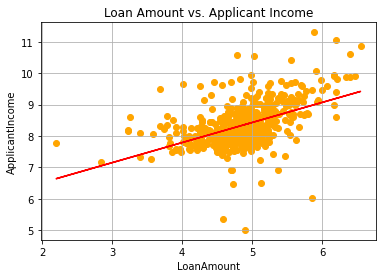

In [42]:
plot_regression(np.log(data['LoanAmount']),np.log(data['ApplicantIncome']))

(array([  1.,   1.,   5.,  16.,  49., 200., 250.,  61.,  19.,  12.]),
 array([2.19722458, 2.63261015, 3.06799573, 3.5033813 , 3.93876688,
        4.37415246, 4.80953803, 5.24492361, 5.68030918, 6.11569476,
        6.55108034]),
 <a list of 10 Patch objects>)

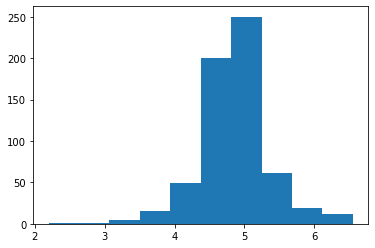

(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

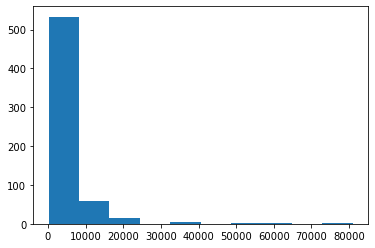